# Cost Sensitive Modelling

## Approach 1: Balanced Class Weights

### RF

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
import os
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix



In [113]:
dfs = pd.read_csv('./processed.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.shape, test.shape , dfs.shape

((75000, 23), (25000, 23), (100000, 22))

In [114]:
dfs.head()

,Customer_ID,Month,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,576,1,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,26.822620,1,1,49.574949,21.46538,2,312.494089,2
1,576,2,1,7.509249,3.0,4.0,3.0,0,3.0,4.0,...,2,28.460148,31.944960,1,1,49.574949,21.46538,3,284.629162,2
2,576,3,1,7.509249,3.0,4.0,3.0,0,3.0,7.0,...,2,28.460148,28.609352,1,1,49.574949,21.46538,4,331.209863,2
3,576,4,1,7.509249,3.0,4.0,3.0,0,5.0,4.0,...,2,28.460148,31.377862,1,1,49.574949,21.46538,5,223.451310,2
4,576,5,1,7.509249,3.0,4.0,3.0,0,6.0,4.0,...,2,28.460148,24.797347,1,1,49.574949,21.46538,1,341.489231,2


In [115]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test, class_weight):
    uncustomized = algorithm(class_weight=class_weight, random_state=0)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    plot_confusion_matrix(uncustomized, # 분류 모델
                             x_test, y_test, # 예측 데이터와 예측값의 정답(y_true)
                             normalize='true')
    return train_score_before, test_score_before

In [116]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시


In [125]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max,step, class_weight):
    train_score = []; test_score =[]
    para_n_tree = [n_tree for n_tree in range(n_estimator_min, n_estimator_max+1,step)] # step 5

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, class_weight=class_weight, random_state=0)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [122]:
# 최종 2개월 valid로 분리
train = dfs.loc[dfs['Month'] <=6]
valid = dfs.loc[dfs['Month'] >6]
train.shape, valid.shape

# train, valid를 각각 x,y 분리

x_train = train.drop(['Credit_Score'],axis=1)
y_train = train['Credit_Score']

x_valid = valid.drop(['Credit_Score'],axis=1)
y_valid = valid['Credit_Score']

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((75000, 21), (75000,), (25000, 21), (25000,))

학습 데이터셋 정확도: 0.9999866666666667
테스트 데이터셋 정확도: 0.73756


/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(0.9999866666666667, 0.73756)

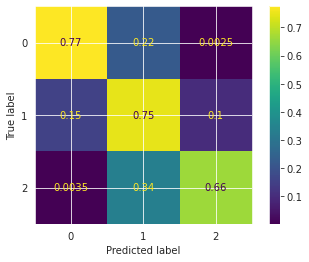

In [124]:
modeling_uncustomized(RandomForestClassifier,x_train,y_train,x_valid,y_valid,class_weight=weight_dict)

In [ ]:
optimi_estimator(RandomForestClassifier, 'rf', x_train, y_train, x_valid, y_valid,100,400,50) # 45 부터 test score 74정도로 비슷 ~ 60 --> d

In [126]:
weighted_rfc = RandomForestClassifier(random_state=0, n_estimators= 400 , max_depth=20, min_samples_split=2 , min_samples_leaf=2, class_weight=weight_dict )

In [128]:
weighted_rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 1.1539455706953214,
                                     1: 0.6162978740188538,
                                     2: 1.9576520704128297},
                       max_depth=20, min_samples_leaf=2, n_estimators=400,
                       random_state=0)

In [129]:
weighted_rfc.score(x_valid, y_valid)

0.7036

### Cat Boost

In [130]:
from catboost import CatBoostClassifier

In [142]:
# CatBoost 모델링
def catboost_model(x_train, y_train, x_test, y_test, class_weights, param={}, computing_type='CPU'):
    """
    catboost 기본 모델

    params:
      x_train : x 학습 데이터프레임
      y_train : y 학습 데이터프레임
      x_test : x 테스트 데이터프레임
      y_test : y 테스트 데이터프레임
      param : 모델에 들어가는 파라미터, 없으면 임의값 적용
      class_weights:
      computing_type : 'CPU' ,'GPU' 적용
    ex)
      model = catboost_model(x_train, y_train, x_test, y_test, param = {}, computing_type = 'GPU',)


    """

    # input 파라미터가 없으면 현재 최적의 파라미터로 대입
    if len(param.keys()):
        params = {'bagging_temperature': 1.7667222733865562,
                  'border_count': 190.14385824950688, 'depth': 14.95981768596572,
                  'l2_leaf_reg': 100.0, 'learning_rate': 0.09356008116567356,
                  'min_data_in_leaf': 4.281513544154046
                  }

    #모델 파라미터 세팅
    model = CatBoostClassifier(eval_metric='Accuracy',  # 정확도
                               iterations=2000,  # 반복횟수
                               metric_period=100,  # 중간결과 출력
                               early_stopping_rounds=200,  # 중간 종료
                               loss_function='MultiClassOneVsAll',
                               class_weights=class_weights,
                               task_type=computing_type,  # CPU/GPU 사용
                               **param
                               )

    #모델 학습
    # model.fit(x_train,y_train, eval_set=(x_test,y_test))
    model.fit(x_train, y_train)

    #테스트값 기반 출력
    train_acc = accuracy_score(list(model.predict(x_train)), y_train)
    test_acc = accuracy_score(list(model.predict(x_test)), y_test)
    print('\n\nTrain Set 기반 accuracy', train_acc)
    print('\n\nTest Set 기반 accuracy', test_acc)

    #confusion matrix 표시
    confusion = plot_confusion_matrix(model, x_test, y_test, cmap='Blues')

    return model

0:	learn: 0.7397924	total: 10.9ms	remaining: 21.7s
100:	learn: 0.7601522	total: 2.09s	remaining: 39.3s
200:	learn: 0.7639044	total: 5.89s	remaining: 52.7s
300:	learn: 0.7653807	total: 7.87s	remaining: 44.4s
400:	learn: 0.7684460	total: 8.78s	remaining: 35s
500:	learn: 0.7715988	total: 9.75s	remaining: 29.2s
600:	learn: 0.7754898	total: 10.7s	remaining: 24.9s
700:	learn: 0.7789618	total: 11.8s	remaining: 21.8s
800:	learn: 0.7822675	total: 12.7s	remaining: 19s
900:	learn: 0.7862033	total: 13.6s	remaining: 16.6s
1000:	learn: 0.7891252	total: 14.5s	remaining: 14.5s
1100:	learn: 0.7929820	total: 15.4s	remaining: 12.6s
1200:	learn: 0.7960744	total: 16.3s	remaining: 10.9s
1300:	learn: 0.7991819	total: 17.2s	remaining: 9.23s
1400:	learn: 0.8018563	total: 18.1s	remaining: 7.72s
1500:	learn: 0.8047773	total: 19s	remaining: 6.31s
1600:	learn: 0.8074552	total: 19.9s	remaining: 4.96s
1700:	learn: 0.8101487	total: 20.8s	remaining: 3.66s
1800:	learn: 0.8129602	total: 21.8s	remaining: 2.4s
1900:	learn

/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


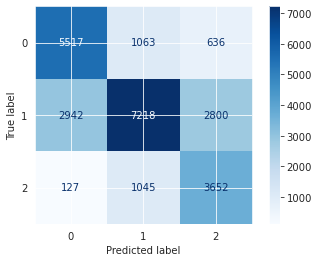

In [143]:
model = catboost_model(x_train, y_train, x_valid, y_valid, class_weights=weight_dict, param={})

### TabNet

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.pretraining import TabNetPretrainer
from pytorch_tabnet.metrics import Metric
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# main_dir = '/content/drive/MyDrive/SKKU_study/01_Final_assignment'
# data_dir = os.path.join(main_dir, 'data')
# processed_data_dir = os.path.join(data_dir, 'processed')
#
# os.makedirs(data_dir, exist_ok=True)
# os.makedirs(processed_data_dir, exist_ok=True)

#### Load Data

In [5]:
dfs = pd.read_csv('./processed.csv')
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.shape, test.shape

((75000, 23), (25000, 23))

In [6]:
le = LabelEncoder()
dfs['Month'] = le.fit_transform(dfs['Month'])
train['Month'] = le.transform(train['Month'])
test['Month'] = le.transform(test['Month'])

#### Model

In [7]:
class F1_Score(Metric):
    def __init__(self):
        self._name = 'f1'
        self._maximize = True

    def __call__(self, y_true, y_score):
        score = f1_score(y_true, (y_score[:, 1]>0.5)*1, average='micro')
        return score

In [9]:
target = 'Credit_Score'
cat_col = ['Customer_ID', 'Month', 'Credit_Mix', 'Credit_History_Age',
           'Payment_of_Min_Amount', 'Payment_Behaviour']
cat_dims = {}
for col in cat_col:
    cat_dims[col] = len(list(dfs[col].unique()))
    print(col, ': ', cat_dims[col])
cat_col_idx = [list(dfs.columns).index(col) for col in cat_col]
cat_col_dims = [cat_dims[col] for col in cat_col]
all_col_list = [col for col in dfs.columns if col !=target]

Customer_ID :  12500
Month :  8
Credit_Mix :  3
Credit_History_Age :  2
Payment_of_Min_Amount :  3
Payment_Behaviour :  6


In [10]:
x_train = train.loc[:, all_col_list].values
y_train = train.loc[:, target].values
x_test = test.loc[:, all_col_list].values
y_test = test.loc[:, target].values

In [11]:
# pretrain model
unsupervised_model = TabNetPretrainer(
    cat_idxs=cat_col_idx,
    cat_dims=cat_col_dims,
    cat_emb_dim=[int(round(np.sqrt(i)/4,0))+1 for i in cat_col_dims],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=5*1e-3),
    scheduler_params={'is_batch_level': True, 'T_0':10, 'T_mult':2, 'eta_min': 0.001},
    scheduler_fn=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts,
    mask_type='entmax'
)

unsupervised_model.fit(
    X_train=x_train,
    max_epochs=90,
    drop_last=False,
    pretraining_ratio=0.6, #0.5
)

reconstructed_X, embedded_X = unsupervised_model.predict(x_train)
assert(reconstructed_X.shape == embedded_X.shape)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 4.28025 |  0:00:17s
epoch 1  | loss: 2.20452 |  0:00:40s
epoch 2  | loss: 1.704   |  0:00:57s
epoch 3  | loss: 1.3925  |  0:01:15s
epoch 4  | loss: 1.22133 |  0:01:31s
epoch 5  | loss: 1.08775 |  0:01:47s
epoch 6  | loss: 1.05976 |  0:02:04s
epoch 7  | loss: 1.04708 |  0:02:22s
epoch 8  | loss: 1.03525 |  0:02:38s
epoch 9  | loss: 1.01098 |  0:02:55s
epoch 10 | loss: 0.99055 |  0:03:13s
epoch 11 | loss: 0.97678 |  0:03:30s
epoch 12 | loss: 0.96681 |  0:03:47s
epoch 13 | loss: 0.95964 |  0:04:02s
epoch 14 | loss: 0.95438 |  0:04:17s
epoch 15 | loss: 0.95037 |  0:04:33s
epoch 16 | loss: 0.94805 |  0:04:50s
epoch 17 | loss: 0.94625 |  0:05:05s
epoch 18 | loss: 0.93837 |  0:05:20s
epoch 19 | loss: 0.9336  |  0:05:40s
epoch 20 | loss: 0.92915 |  0:05:56s
epoch 21 | loss: 0.92649 |  0:06:15s
epoch 22 | loss: 0.92034 |  0:06:30s
epoch 23 | loss: 0.91689 |  0:06:45s
epoch 24 | loss: 0.91

In [14]:
from sklearn.utils.class_weight import compute_class_weight

In [15]:
weights = compute_class_weight(class_weight = "balanced" ,
                               classes=np.unique(y_train),
                               y = y_train)

weights

array([1.14773666, 0.62167404, 1.92248539])

In [16]:
model = TabNetClassifier(
    cat_idxs=cat_col_idx,
    cat_dims=cat_col_dims,
    cat_emb_dim=[int(round(np.sqrt(i)/4,0))+1 for i in cat_col_dims],
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3),
    scheduler_params={'is_batch_level': True, 'T_0':10, 'T_mult':2, 'eta_min': 0.001},
    scheduler_fn=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts,
    mask_type='sparsemax',
    gamma=1.3,
    )

Device used : cpu


In [18]:
model.fit(
    X_train=x_train,
    y_train=y_train,
    eval_set=[(x_train, y_train)],
    eval_name=['train'],
    eval_metric=['balanced_accuracy', 'accuracy'],
    max_epochs=50,
    patience=5,
    weights=1,  # 0: no, 1: balanced, dict: customized
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
    from_unsupervised=unsupervised_model,
)

Loading weights from unsupervised pretraining
epoch 0  | loss: 8.7711  | train_balanced_accuracy: 0.44558 | train_accuracy: 0.57796 |  0:00:16s
epoch 1  | loss: 1.01365 | train_balanced_accuracy: 0.74048 | train_accuracy: 0.68984 |  0:00:32s
epoch 2  | loss: 0.74499 | train_balanced_accuracy: 0.7387  | train_accuracy: 0.697   |  0:00:50s
epoch 3  | loss: 0.69845 | train_balanced_accuracy: 0.74717 | train_accuracy: 0.69551 |  0:01:07s
epoch 4  | loss: 0.66422 | train_balanced_accuracy: 0.75758 | train_accuracy: 0.71317 |  0:01:24s
epoch 5  | loss: 0.60537 | train_balanced_accuracy: 0.77796 | train_accuracy: 0.73088 |  0:01:40s
epoch 6  | loss: 0.55496 | train_balanced_accuracy: 0.8043  | train_accuracy: 0.76481 |  0:01:56s
epoch 7  | loss: 0.50245 | train_balanced_accuracy: 0.82772 | train_accuracy: 0.79704 |  0:02:13s
epoch 8  | loss: 0.45662 | train_balanced_accuracy: 0.84491 | train_accuracy: 0.81801 |  0:02:50s
epoch 9  | loss: 0.42325 | train_balanced_accuracy: 0.86132 | train_accu

#### Result

In [19]:
from sklearn.metrics import classification_report

In [20]:
for i in range(len(all_col_list)):
    print(all_col_list[i], ': ', model.feature_importances_.round(3)[i])

Customer_ID :  0.708
Month :  0.03
Age :  0.001
Monthly_Inhand_Salary :  0.017
Num_Bank_Accounts :  0.004
Num_Credit_Card :  0.007
Interest_Rate :  0.024
Num_of_Loan :  0.0
Delay_from_due_date :  0.002
Num_of_Delayed_Payment :  0.009
Changed_Credit_Limit :  0.001
Num_Credit_Inquiries :  0.015
Credit_Mix :  0.078
Outstanding_Debt :  0.034
Credit_Utilization_Ratio :  0.002
Credit_History_Age :  0.019
Payment_of_Min_Amount :  0.011
Total_EMI_per_month :  0.006
Amount_invested_monthly :  0.006
Payment_Behaviour :  0.0
Monthly_Balance :  0.028


In [23]:
print(classification_report(y_true=y_train, y_pred=model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     21782
           1       0.99      0.86      0.92     40214
           2       0.86      0.99      0.92     13004

    accuracy                           0.92     75000
   macro avg       0.90      0.95      0.92     75000
weighted avg       0.93      0.92      0.92     75000



In [26]:
# f1_score(y_train, (model.predict(x_train)))

In [27]:
predicted = model.predict(x_test)

In [28]:
print(f1_score(y_test, predicted, average='weighted'))
print(accuracy_score(y_test, predicted))

0.7489961247812217
0.7496


In [29]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      7216
           1       0.79      0.71      0.75     12960
           2       0.71      0.73      0.72      4824

    accuracy                           0.75     25000
   macro avg       0.74      0.76      0.75     25000
weighted avg       0.75      0.75      0.75     25000



In [31]:
print(confusion_matrix(y_test, predicted))

[[6055 1156    5]
 [2333 9156 1471]
 [  12 1283 3529]]


class weight 부여 후 0과 2클래스에 대해 더 많이 맞췄음.

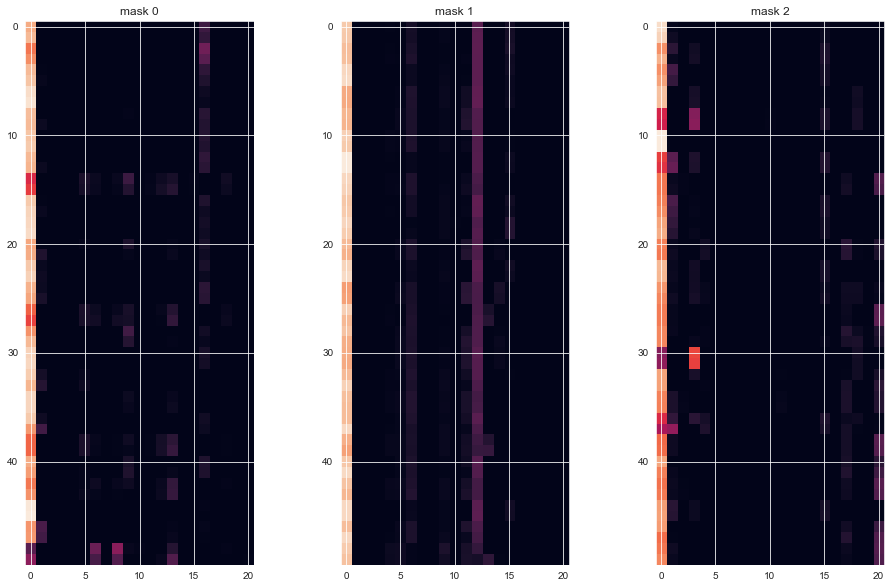

In [32]:
explain_matrix, masks = model.explain(x_test)

fig, axs = plt.subplots(1, 3, figsize=(16,10))
for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")

### CNN

In [144]:
import numpy as np

In [145]:
# CNN용 데이터 로딩
train_data = np.load('./train_reshape_CNN.npz')  # 구글 드라이브에 마운트해서 쓰십쇼.!! 경로 npz 올려두었습니다.
X_train_reshape = train_data['x']
y_train = train_data['y']

print(X_train_reshape.shape)
print(y_train.shape)

train_data.close()
test_data = np.load('./test_reshape_CNN.npz')
X_test_reshape = test_data['x']
y_test = test_data['y']

print(X_test_reshape.shape)
print(y_test.shape)

test_data.close()

(75000, 21, 1)
(75000,)
(25000, 21, 1)
(25000,)


In [146]:
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import itertools # 중첩리스트 제거용

In [147]:
weights = compute_class_weight(class_weight = "balanced" ,
                               classes=np.unique(y_train),
                               y = y_train)

weights

array([1.14773666, 0.62167404, 1.92248539])

동일 weight 확인

In [148]:
i = 0
for idx, label_weight in enumerate(weights):
    if idx == i:
        print(pd.Series(y_train).value_counts()[i] * label_weight)
    i += 1

24999.999999999996
25000.0
25000.0


In [149]:
weight_dict = {k : v for k, v in enumerate(weights)}
weight_dict

{0: 1.1477366632999724, 1: 0.6216740438653205, 2: 1.9224853891110427}

In [150]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [153]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [154]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [155]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [156]:
import os

In [157]:
num_classes = 3

In [158]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42


In [159]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 20, 256)           768       
                                                                 
 dropout_8 (Dropout)         (None, 20, 256)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 17, 256)           262400    
                                                                 
 dropout_9 (Dropout)         (None, 17, 256)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 10, 256)           524544    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                      

In [160]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('weighted_cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [161]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=weight_dict, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-18 19:19:11.615298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.0536 - acc: 0.3360

2022-11-18 19:19:28.962332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.50180, saving model to weighted_cnn_best_model.h5
938/938 [==============================] - 21s 22ms/step - loss: 1.0536 - acc: 0.3360 - val_loss: 0.9030 - val_acc: 0.5018
Epoch 2/50
937/938 [============================>.] - ETA: 0s - loss: 0.9572 - acc: 0.3751
Epoch 2: val_acc improved from 0.50180 to 0.58147, saving model to weighted_cnn_best_model.h5
938/938 [==============================] - 20s 22ms/step - loss: 0.9572 - acc: 0.3751 - val_loss: 0.8828 - val_acc: 0.5815
Epoch 3/50
937/938 [============================>.] - ETA: 0s - loss: 0.9485 - acc: 0.4287
Epoch 3: val_acc improved from 0.58147 to 0.65113, saving model to weighted_cnn_best_model.h5
938/938 [==============================] - 20s 21ms/step - loss: 0.9485 - acc: 0.4288 - val_loss: 0.8642 - val_acc: 0.6511
Epoch 4/50
937/938 [============================>.] - ETA: 0s - loss: 0.8928 - acc: 0.5397
Epoch 4: val_acc improved from 0.65113 to 0.71087, saving model to weighted_cn

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


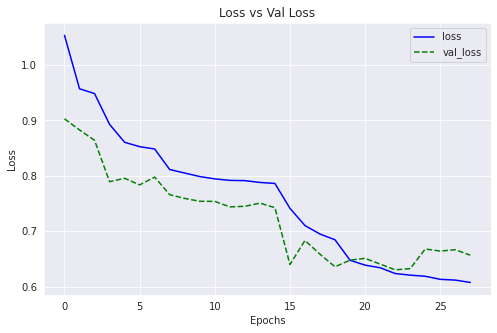

In [162]:
plot_loss(history)

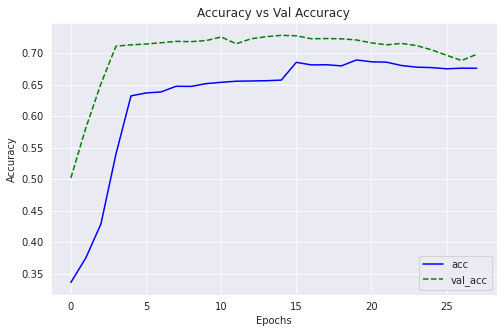

In [163]:
plot_acc(history)

In [164]:
best_model = load_model('./weighted_cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

 14/782 [..............................] - ETA: 6s - loss: 0.8234 - acc: 0.6496

2022-11-18 19:28:19.085551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 6s 7ms/step - loss: 0.8411 - acc: 0.6328
Test Accuracy: 0.6327600479125977


In [165]:
print("Train Accuracy: {}".format(best_model.evaluate(X_train_reshape, y_train)[1]))

2344/2344 [==============================] - 16s 7ms/step - loss: 0.7416 - acc: 0.7246
Train Accuracy: 0.7246400117874146


 51/782 [>.............................] - ETA: 2s

2022-11-18 19:28:40.744273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.6858    0.5485    0.6095      7216
           1     0.6877    0.6489    0.6678     12960
           2     0.4930    0.7154    0.5837      4824

    accuracy                         0.6328     25000
   macro avg     0.6222    0.6376    0.6203     25000
weighted avg     0.6496    0.6328    0.6347     25000



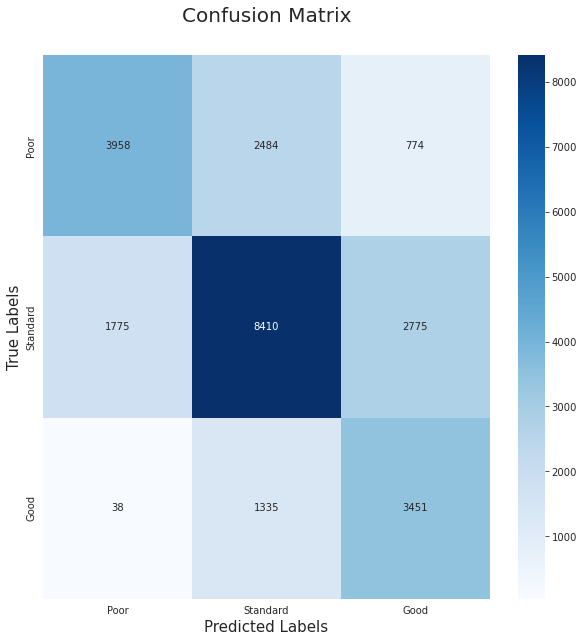

In [166]:
clf_report_plot(y_test, X_test_reshape, best_model)

In [195]:
import numpy as np

In [196]:
# CNN용 데이터 로딩
train_data = np.load('./train_reshape_CNN.npz')  # 구글 드라이브에 마운트해서 쓰십쇼.!! 경로 npz 올려두었습니다.
X_train_reshape = train_data['x']
y_train = train_data['y']

print(X_train_reshape.shape)
print(y_train.shape)

train_data.close()
test_data = np.load('./test_reshape_CNN.npz')
X_test_reshape = test_data['x']
y_test = test_data['y']

print(X_test_reshape.shape)
print(y_test.shape)

test_data.close()

(75000, 21, 1)
(75000,)
(25000, 21, 1)
(25000,)


In [197]:
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import itertools # 중첩리스트 제거용

In [198]:
weights = compute_class_weight(class_weight = "balanced" ,
                               classes=np.unique(y_train),
                               y = y_train)

weights

array([1.14773666, 0.62167404, 1.92248539])

동일 weight 확인

In [199]:
i = 0
for idx, label_weight in enumerate(weights):
    if idx == i:
        print(pd.Series(y_train).value_counts()[i] * label_weight)
    i += 1

24999.999999999996
25000.0
25000.0


In [200]:
weight_dict = {k : v for k, v in enumerate(weights)}
weight_dict

{0: 1.1477366632999724, 1: 0.6216740438653205, 2: 1.9224853891110427}

In [201]:
import tensorflow as tf
from time import time
from datetime import timedelta
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
# loss와 accuracy 시각화를 위한 함수 정의
def plot_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'g--', label='val_loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Val Loss')
    plt.legend()
    plt.show()

def plot_acc(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['acc'], 'b-', label='acc')
    plt.plot(history.history['val_acc'], 'g--', label='val_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Val Accuracy')
    plt.legend()
    plt.show()

In [204]:
# 결과 재활용을 위한 시드 설정 함수 정의
import random
def set_seed(seed: int = 42) -> None:
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.experimental.numpy.random.seed(seed)
    # When running on the CuDNN backend, two further options must be set
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

In [205]:
# 분류모델 결과 평가를 위한 혼동행렬 리포트 & 시각화 함수 정의
def clf_report_plot(y_true, X_test, model):

    result = model.predict(X_test)

    y_pred = []
    for pred in result:
        y_pred.append(np.argmax(pred))

    print(classification_report(y_true, y_pred, digits=4))

    # plt.rc('font', family='NanumGothicOTF') # For MacOS
    plt.rc('font', family='NanumGothic') # For Windows

    ax = plt.subplot()
    ax.figure.set_size_inches(10, 10)
    cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
    sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', ax=ax)

    ax.set_title('Confusion Matrix',fontsize=20, y=1.05)
    ax.set_xlabel('Predicted Labels', fontsize=15)
    ax.set_ylabel('True Labels', fontsize=15)

    ax.xaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    ax.yaxis.set_ticklabels(['Poor', 'Standard', 'Good'])
    plt.show()

In [206]:
from tensorflow.keras.models import Sequential, load_model, Model

from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Input

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report

In [207]:
import os

In [208]:
num_classes = 3

In [209]:
set_seed(42)
model = Sequential()
model.add(Input(shape=(num_features, input_dim)))
model.add(Conv1D(256, kernel_size=2, activation='relu'))
# model.add(MaxPooling1D(pool_size=3, strides=1))
model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=4, activation='relu'))

model.add(Dropout(0.3))
model.add(Conv1D(256, kernel_size=8, activation='relu'))
# model.add(Conv1D(64, kernel_size=4, strides=4, activation='relu'))
model.add(MaxPooling1D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(num_classes, activation='softmax'))

Random seed set as 42


In [210]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 20, 256)           768       
                                                                 
 dropout_16 (Dropout)        (None, 20, 256)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 17, 256)           262400    
                                                                 
 dropout_17 (Dropout)        (None, 17, 256)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 10, 256)           524544    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 256)           0         
 1D)                                                             
                                                      

In [211]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('lr_adj_weighted_cnn_best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

/Users/ben/miniforge3/envs/tf_mini/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [212]:
print('Algorithm starts learning.....')
start_time = time()

history = model.fit(X_train_reshape, y_train, epochs=50, batch_size=64, validation_split=0.2, class_weight=weight_dict, callbacks=[es, mc] )

print("Learning Durations: ", timedelta(seconds=(time() - start_time)))

Algorithm starts learning.....
Epoch 1/50


2022-11-19 09:52:35.386140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 1.2814 - acc: 0.3264

2022-11-19 09:52:53.150332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_acc improved from -inf to 0.37367, saving model to lr_adj_weighted_cnn_best_model.h5
938/938 [==============================] - 21s 22ms/step - loss: 1.2814 - acc: 0.3264 - val_loss: 0.9795 - val_acc: 0.3737
Epoch 2/50
938/938 [==============================] - ETA: 0s - loss: 0.9649 - acc: 0.3724
Epoch 2: val_acc improved from 0.37367 to 0.47953, saving model to lr_adj_weighted_cnn_best_model.h5
938/938 [==============================] - 20s 21ms/step - loss: 0.9649 - acc: 0.3724 - val_loss: 0.9095 - val_acc: 0.4795
Epoch 3/50
937/938 [============================>.] - ETA: 0s - loss: 0.8860 - acc: 0.4502
Epoch 3: val_acc improved from 0.47953 to 0.58900, saving model to lr_adj_weighted_cnn_best_model.h5
938/938 [==============================] - 20s 21ms/step - loss: 0.8860 - acc: 0.4502 - val_loss: 0.8621 - val_acc: 0.5890
Epoch 4/50
938/938 [==============================] - ETA: 0s - loss: 0.8495 - acc: 0.4986
Epoch 4: val_acc improved from 0.58900 to 0.65393, saving

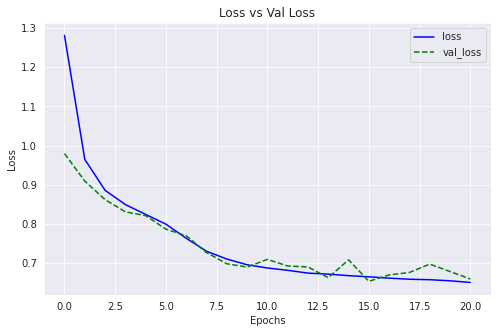

In [213]:
plot_loss(history)

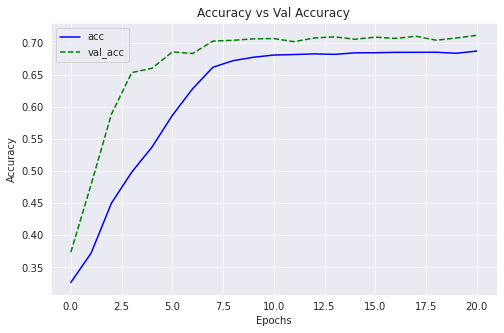

In [214]:
plot_acc(history)

In [215]:
best_model = load_model('./lr_adj_weighted_cnn_best_model.h5')
print('Test Accuracy: {}'.format(best_model.evaluate(X_test_reshape, y_test)[1]))

 15/782 [..............................] - ETA: 5s - loss: 0.7973 - acc: 0.6417

2022-11-19 09:59:05.425736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 5s 6ms/step - loss: 0.8344 - acc: 0.6068
Test Accuracy: 0.6067600250244141


In [216]:
print("Train Accuracy: {}".format(best_model.evaluate(X_train_reshape, y_train)[1]))

2344/2344 [==============================] - 14s 6ms/step - loss: 0.6667 - acc: 0.6995
Train Accuracy: 0.6994799971580505


 72/782 [=>............................] - ETA: 1s

2022-11-19 09:59:24.340741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0     0.5857    0.7136    0.6433      7216
           1     0.7505    0.5019    0.6016     12960
           2     0.4661    0.7286    0.5685      4824

    accuracy                         0.6068     25000
   macro avg     0.6008    0.6480    0.6045     25000
weighted avg     0.6481    0.6068    0.6072     25000



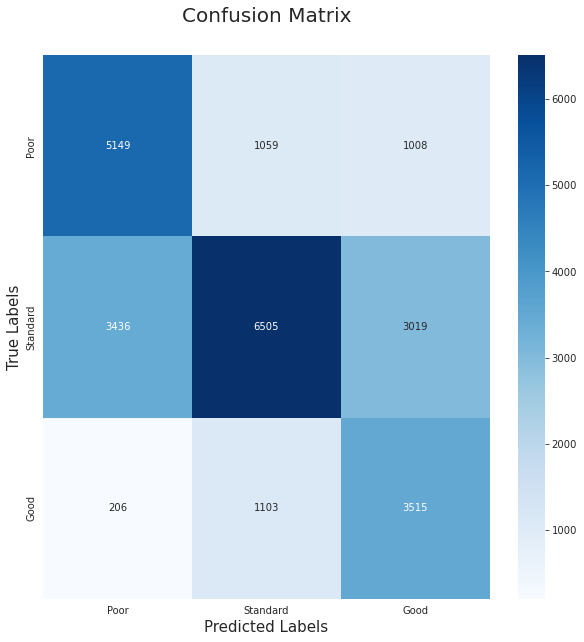

In [217]:
clf_report_plot(y_test, X_test_reshape, best_model)